In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
n = 2
grover_circuit = QuantumCircuit(n)

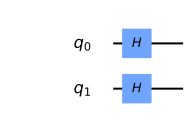

In [3]:
for qubit in range(n):
    grover_circuit.h(qubit)
grover_circuit.draw('mpl')

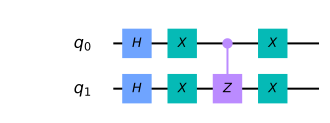

In [4]:
for qubit in range(n):
    grover_circuit.x(qubit)

grover_circuit.cz(0, 1)

for qubit in range(n):
    grover_circuit.x(qubit)

grover_circuit.draw('mpl')

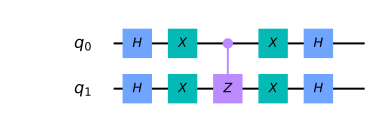

In [5]:
for qubit in range(n):
    grover_circuit.h(qubit)
grover_circuit.draw('mpl')

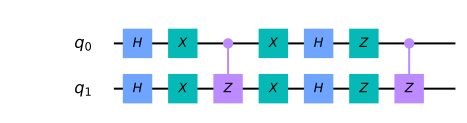

In [6]:
for qubit in range(n):
    grover_circuit.z(qubit)
grover_circuit.cz(0, 1)

grover_circuit.draw('mpl')

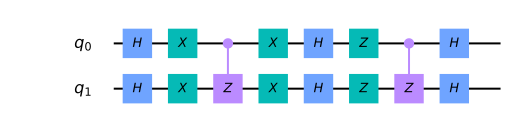

In [7]:
for qubit in range(n):
    grover_circuit.h(qubit)

grover_circuit.draw('mpl')

In [8]:
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(grover_circuit, backend_sim)
statevec = job_sim.result().get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

ModuleNotFoundError: No module named 'qiskit_textbook'

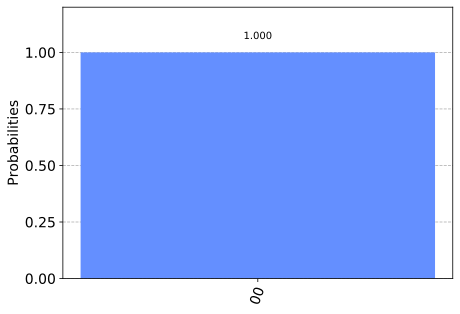

In [9]:
grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [10]:
provider = IBMQ.load_account()
device = least_busy(provider.backends(simulator=False))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibmqx2


In [11]:
#Запуск на реальном устройстве
from qiskit.tools.monitor import job_monitor
job = execute(grover_circuit, backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)

Job Status: job has successfully run


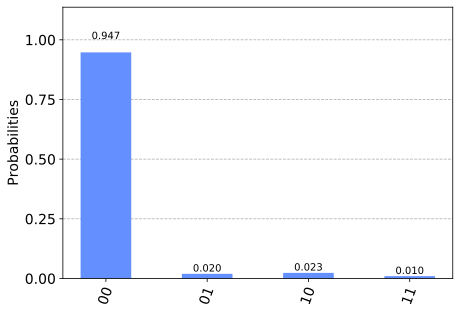

In [12]:
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)